# Lab 8

# Problem 1

<b>(15 points) </b> Following the merge sort algorithm, show all the steps for sorting the following unordered list of integers:

5, 8, 6, 9, 0, 2, 5, 7

Here is merge_sort from lecture for reference

```python
def merge_sort(lst):
    """ Use the Merge sort algorithm to sort a list"""
    
    n = len(lst)

    if n < 2:
        return lst
    
    # Sort left and right
    left_lst = merge_sort(lst[:n//2])
    right_lst = merge_sort(lst[n//2:])
    
    # Merge the two
    merged = []
    
    ii = 0
    jj = 0
    while ii < len(left_lst) and jj < len(right_lst):
        if left_lst[ii] < right_lst[jj]:
            merged.append(left_lst[ii])
            ii = ii + 1
        else:
            merged.append(right_lst[jj])
            jj = jj + 1
    
    while ii < len(left_lst):
        merged.append(left_lst[ii])
        ii = ii + 1
        
    while jj < len(right_lst):
        merged.append(right_lst[jj])
        jj = jj + 1
    
    return merged
```

![# title](merge-tree.png)

Referring to the diagram above, our `merge_sort()` algorithm will travel the left-most branch until the sequence of "left lists" `lst = lst[:n//2]` collapses into the base case `[5]`. At this stage, the corresponding "right list", `right_lst = merge_sort(lst[n//2:])`, will also return `[8]`, and the remaining recursive call will merge the lists and return `[5, 8]`.

We then move one branch up the tree, corresponding to one lower recursive call. Now, `left_lst == [5, 8]` and `right_lst` splits and merges in the same way as described above to return `[6, 9]`. The remainder of this recursive call merges the lists to return `[5, 6, 8, 9]`.

The code then moves one branch higher, with `left_lst == [5, 6, 8, 9]` and `right_lst = merge_sort([0, 2, 5, 7])`. Through a similar process described above, `merge_sort([0, 2, 5, 7])` recurses six times further to eventually return `[0, 2, 5, 7]`. Again, the remainder of the code at this depth merges the two sorted lists and returns `[0, 2, 5, 5, 6, 7, 9]`.

Essentially, the algortihm looks like this:

```python
# Sequence of `left_lst = merge_sort(lst[:n//2])`:
[5, 8, 6, 9, 0, 2, 5, 7] -> [5, 8, 6, 9] -> [5, 8] -> [5] 
```

&#8595;

```python
# At recursion level 2
left_lst == [5]
right_lst = merge_sort([5, 8][n//2:]) == merge_sort([8]) == [8]
merged == [5, 8] # Returned to `left_lst` one recursive layer up.
```

&#8595;

```python
# At recursion level 1
left_lst == [5, 8]
right_lst = merge_sort([5, 8, 6, 9][n//2:]) 
    == merge_sort([6, 9])  
    == ... 
    == [6, 9]
merged == [5, 6, 8, 9]  # Returned to `left_lst` one recursive layer up.
```

&#8595;

```python
# At recursion level 0 (initial function call)
left_lst == [5, 6, 8, 9]
right_lst = merge_sort([5, 8, 6, 9, 0, 2, 5, 7][n//2:]) 
    == merge_sort([0, 2, 5, 7]) 
    == ... 
    == [0, 2, 5, 7]
merged == [0, 2, 5, 5, 6, 7, 9]  # Returned from `merge_sort()`
```

# Problem 2

<b>(15 points) </b> 
Here is binary search from lecture:
    
```python
def binary_search(L, elem):
"""Uses the binary search algorithm to search for elem in L
Assumes L is sorted. """

# Base case
n = len(L)
if n == 1:
    return L[0] == elem

# Get the middle position in the list
m = n // 2

if L[m] == elem:
    return True
elif L[m] > elem:
    return binary_search(L[0:m], elem)
else:
    return binary_search(L[m:], elem)
```

List all recursive calls to `binary_search` when the input list is L = [23, 43, 51, 56, 63, 66, 74, 80, 95, 101] and elem = 92.

Repeat for elem = 43.

## Solution

### For `elem = 92`

* `l = [23, 43, 51, 56, 63, 66, 74, 80, 95, 101]`

`l[n//2] == l[5] == 66`, which is less than 92, so we recurse with `l = l[n//2:]`:

* `l = [66, 74, 80, 95, 101]`

`l[n//2] == l[2] == 80`, which is less than 92, so we recurse with `l = l[n//2:]`:

* `l = [80, 95, 101]`

`l[n//2] == l[1] == 95`, which is greater than 92, so we recurse with `l = l[:n//2]`:

* `l = [80]`.

We are now at the base case, and `l[0] != 92`, so the function returns `False`.

### For `elem = 43`

* `l = [23, 43, 51, 56, 63, 66, 74, 80, 95, 101]`

`l[n//2] == l[5] == 66`, which is greater than 43, so we recurse with `l = l[:n//2]`:

* `l = [23, 43, 51, 56, 63]`

`l[n//2] == l[2] == 51`, which is greater than 43, so we recurse with `l = l[:n//2]`:

* `l = [23, 43]`

`l[n//2] == l[1] == 43`, which is the number we are looking for, so the function returns `True`.

# Problem 3

<b>(30 points) </b> Use the merge sort algorithm to write a function that will sort a list to tuples of integers. The sorting order should be determined by the sum of the integers in the tuple. For example, (5, 2) should precede (1, 8) and follow (1, 2, 3).

An example:
```python
>>> lst = [(1, 3, 2), (4, 3, 10), (-5, 2, 1), (0, 0, 0)]
>>> merge_sort_tuples(lst)
[(-5, 2, 1), (0, 0, 0), (1, 3, 2), (4, 3, 10)]
```

In [46]:
from typing import Callable # For function type-hinting

def merge_sort_tuples(
        lst: list[tuple], 
        key: Callable[[list], int | float] = lambda x: sum(x), 
        ascending: bool = True,
    ) -> list[tuple]:
    """
    Uses the Merge sort algorithm to sort a list of tuples.

    :param lst: The list to be sorted.
    :param key: (Optional) A function to specify the sorting criteria.
    :param ascending: Whether the order should be ascending or descending.
    """
    
    ## TODO Your code here

    if ascending:
        # Order smallest to largest
        ordered = lambda x, y: (x - y) <= 0
    else:
        # Order largest to smallest
        ordered = lambda x, y: (x - y) >= 0

    n = len(lst)

    if n < 2:
        return lst
    
    # Sort left and right
    left_lst = merge_sort_tuples(lst[:n//2], key, ascending)
    right_lst = merge_sort_tuples(lst[n//2:], key, ascending)
    
    # Merge the two
    merged = []
    
    i = 0
    j = 0
    while i < len(left_lst) and j < len(right_lst):
        # Order based on the `key` function
        if ordered(key(left_lst[i]), key(right_lst[j])):
            merged.append(left_lst[i])
            i += 1
        else:
            merged.append(right_lst[j])
            j += 1
    
    while i < len(left_lst):
        merged.append(left_lst[i])
        i += 1
        
    while j < len(right_lst):
        merged.append(right_lst[j])
        j += 1
    
    return merged

In [45]:
lst = [(1, 3, 2), (4, 3, 10), (-5, 2, 1), (0, 0, 0)]

lst_sum = merge_sort_tuples(lst)
lst_square = merge_sort_tuples(lst, key = lambda x: sum(k**2 for k in x))

print(f"{lst = }")

print("\nAscending\n~~~~~~~~~")
print(f"Ordered by sum of elements: {lst_sum}")
print(f"Ordered by sum of squares:  {lst_square}")

lst_sum = merge_sort_tuples(lst, ascending=False)
lst_square = merge_sort_tuples(
    lst, key = lambda x: sum(k**2 for k in x), ascending=False
)

print("\nDescending\n~~~~~~~~~~")
print(f"Ordered by sum of elements: {lst_sum}")
print(f"Ordered by sum of squares:  {lst_square}")

lst = [(1, 3, 2), (4, 3, 10), (-5, 2, 1), (0, 0, 0)]

Ascending
~~~~~~~~~
Ordered by sum of elements: [(-5, 2, 1), (0, 0, 0), (1, 3, 2), (4, 3, 10)]
Ordered by sum of squares:  [(0, 0, 0), (1, 3, 2), (-5, 2, 1), (4, 3, 10)]

Descending
~~~~~~~~~~
Ordered by sum of elements: [(4, 3, 10), (1, 3, 2), (0, 0, 0), (-5, 2, 1)]
Ordered by sum of squares:  [(4, 3, 10), (-5, 2, 1), (1, 3, 2), (0, 0, 0)]


# Problem 4

<b>(20 points) </b>
Using similar logic as binary search, we can write another searching method called <b>`ternary_search()`</b>:

Searching a list `L` for an element `elem`:

* Assume `L` is sorted.
* Split the list into thirds (first segment of the list, middle segment, last segment).
    * Call the splitting indices `m1` and `m2`. 
* Check if the `L[m2]` is `elem`.
* Check if `L[m1]` is `elem`. 
* Based on the values of `L[m1]` and `L[m2]`, we will only have to search in one of the three segments of L.
    * if `L[m2] < elem`, search the last segment using a recursive call to ternary_search.
    * if  `L[m1] < elem < L[m2]`, search the middle segment using a recursive call to ternary_search.
    * if  `L[m1] > elem`, search the first segment using a recursive call to ternary_search.


If L = [5, 8, 11, 14, 17, 20, 23, 54], as an example, the split points are `m1 = 2` and `m2 = 5`. 

The first segment is [5, 8, 11]. 
The second segment is [14, 17, 20].
The last segment is [20, 23, 54].

Complete the `ternary_search()` function below using recursion. 

In [47]:
def ternary_search(L, elem):
    """ 
    Return True or False if elem is in L using ternary search.
    Assumes L is sorted. 

    :param L: The list to examine.
    :param elem: The element we want to check for in L.
    """
    
    # Length of the list
    n = len(L)
    
    # base cases (if the list is only 1 or 2 elements long)
    if n == 1:
        return L[0] == elem
    if n == 2:
        # TODO add your code here
        return L[0] == elem or L[1] == elem

    # Get the two split locations (splitting list into thirds)
    m1 = n // 3
    m2 = 2 * n // 3     

    if L[m1] == elem:
        return True
    
    if L[m2] == elem:
        return True
    
    # TODO add your code here
    if elem < L[m1]:
        return ternary_search(L[:m1], elem)
    if elem < L[m2]:
        return ternary_search(L[m1:m2], elem)
    if elem > L[m2]:
        return ternary_search(L[m2:], elem)

In [51]:
""" 
To check if `ternary_search()` works
"""

lst = [1, 1, 2, 3, 5, 8]

print(f"{lst = }\n")

for elem in range(10):
    print(f"{elem} in `lst` is {ternary_search(lst, elem)}")

lst = [1, 1, 2, 3, 5, 8]

"0 in `lst`" == False
"1 in `lst`" == True
"2 in `lst`" == True
"3 in `lst`" == True
"4 in `lst`" == False
"5 in `lst`" == True
"6 in `lst`" == False
"7 in `lst`" == False
"8 in `lst`" == True
"9 in `lst`" == False


Turns out, this is still an $O(\log n)$ algorithm.

# Problem 5

<b>(20 points) </b> Here is recursive Fibonacci function from Lecture 6:

```python
def fib(n):
    """ Returns the nth Fibonacci number"""
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return fib(n - 1) + fib(n - 2)
```

This recursive function is unfortunately $O(2^n)$ (it's very very slow). Even finding the 50th Fibonacci number takes far too long.

A better way of finding the Nth Fibonacci number, $F_N$, is to keep track of only the previous two Fibonacci numbers $F_{n-1}$ and $F_{n - 2}$ starting with $F_0$ and $F_1$. Repeat until $F_N$ is found.

In words:
* Start with $F_{i - 2} = 0$ and  $F_{i - 1} = 1$
* Calculate $F_{i} = F_{i - 1} + F_{i - 2}$
* Increment $i$
    * Update $F_{i - 2}$ and  $F_{i - 1}$
* Repeat until i = n

This could be implemented using a `while` loop. Complete the function below to calculate $F_n$ and also return the number of times the while loop is run using the `ctr` variable.

In [51]:
def fib(n):
    """ Calculate the nth Fibonacci number"""
    f_i_minus_2 = 0
    f_i_minus_1 = 1

    if n <= 1:
        return n, 0
    
    # ctr will count the number of times the while loop is executed
    ctr = 0
    i = 2
    while (i <= n):
        # TODO Add your code here 
        ctr += 1
        i += 1
        f_i = f_i_minus_2 + f_i_minus_1
        f_i_minus_2 = f_i_minus_1
        f_i_minus_1 = f_i

    return f_i, ctr

In [63]:
""" 
For fun, Fibonacci with memoization
"""

cache = {}

def fib_memo(n):
    if not isinstance(n, int):
        raise TypeError(f"{n = } must be an integer.")
    if n < 0:
        raise ValueError(f"{n = } must be nonnegative.")
    if n <= 1:
        return n
    if n in cache: 
        return cache.get(n)
    
    to_return = fib_memo(n-2) + fib_memo(n-1)
    cache[n] = to_return
    return to_return
    

In [65]:
%timeit fib_memo(100)
%timeit fib(100) 

92.2 ns ± 0.836 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)
4.61 µs ± 219 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Below, use matplotlib to create a plot of the `ctr` value versus `n`.

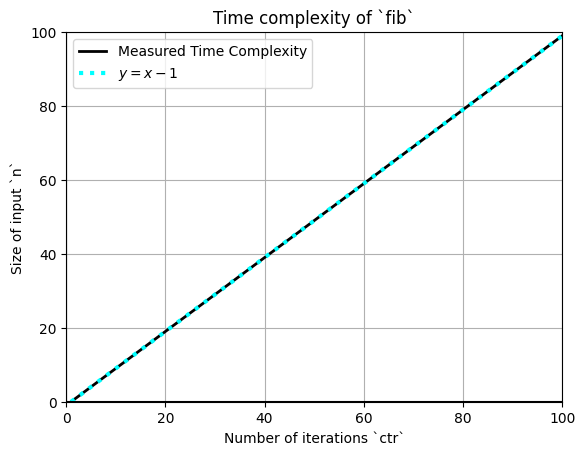

In [88]:
import numpy as np
import matplotlib.pyplot as plt

n_arr = np.linspace(1, 100, 100)
ctr_arr = np.zeros(np.shape(n_arr))

for idx, n in enumerate(n_arr):
    fibn, ctr = fib(n)
    ctr_arr[idx] = ctr

# TODO Add your code to plot n_arr vs ctr_arr here
plt.plot(
    n_arr, 
    ctr_arr, 
    color = "black", 
    linewidth = 2, 
    label = "Measured Time Complexity"
)
plt.plot(
    n_arr, 
    n_arr - 1, 
    color = 'cyan', 
    linestyle = ':', 
    linewidth = 3, 
    label = "$y = x - 1$"
)

plt.title("Time complexity of `fib`")
plt.xlabel("Number of iterations `ctr`")
plt.ylabel("Size of input `n`")

plt.axhline(0, color="k")
plt.axvline(0, color="k")

plt.xlim(0, 100)
plt.ylim(0, 100)

plt.legend()
plt.grid()

What does `ctr` represent?  Based on the plot, what is the time complexity of the new `fib()` function?

## Solution

`ctr` counted the number of times the loop is run, i.e., it is a measure of the time complexity of the algorithm. Based on the plot, the time complexity is linear in the input size `n`. Indeed, `ctr` just counts the number of iterations of the while loop, which occurs until `i` is greater than `n`. Since `i` starts at `2` and is incremented each iteration, it takes $(n+1)-2 = n-1$ iterations for `i` to exceed `n`, meaning the number of loop iterations is $n-1$ and so the algorithm is $\mathcal{O}(n)$